# Libraries to Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Transportation Planning

**Gravity Model** 

$$ T_{ij} = P_i\left[\frac{A_j F_{ij} k_{ij}}{\sum_{j}{A_j F_{ij} k_{ij}}}\right] \\ $$

- T_ij = Number of trips that are produced in zone i and attracted to zone j
- Pi = Total number of trips produced in zone i
- Aj = Number of trips attracted to zone j 
- F_ij = Value that is an inverse function of travel time between zones i and j
- K_ij = Socioeconomic adjustment factor for interchange ij 

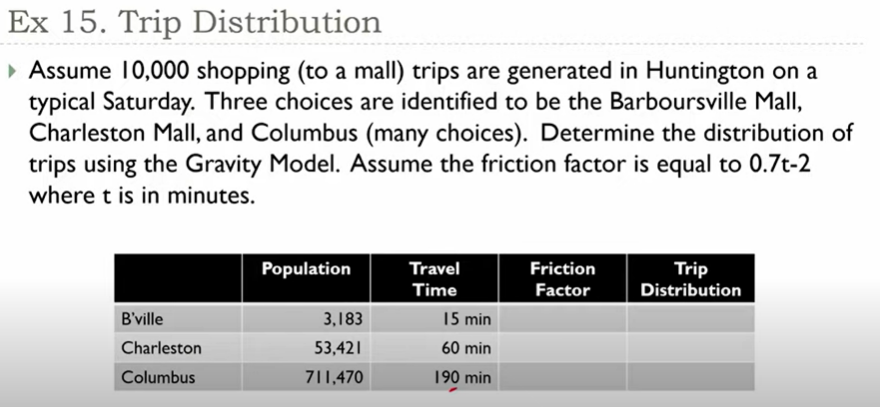

$$ f =  0.7t^{-2} $$

In [2]:
P = 10000 # Number of passengers so this is Pij

In [3]:
# Note this should be 0.7t^-2
data = pd.read_excel('datasets/trip_distribution.xlsx')
data.head()

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,NaN,NaN
1,Charleston,53421,60,NaN,NaN
2,Columbus,711470,190,NaN,NaN


In [4]:
data['Friction_Factor'] = 0.7*1/(data['Travel Time']**2)
data

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,0.003111,NaN
1,Charleston,53421,60,0.000194,NaN
2,Columbus,711470,190,0.000019,NaN


In [5]:
data.keys()

Index(['Cities', 'Population', 'Travel Time', 'Friction_Factor',
       'Trip Distribution'],
      dtype='object')

In [6]:
denom = np.sum(data['Population']*data['Friction_Factor'])
data['Trip Distribution'] = P*(data['Population']*data['Friction_Factor']/denom)
data

,Cities,Population,Travel Time,Friction_Factor,Trip Distribution
0,B'ville,3183,15,0.003111,2905.209051
1,Charleston,53421,60,0.000194,3047.423278
2,Columbus,711470,190,0.000019,4047.367671


In [7]:
data.to_excel('datasets/trip_distribution_modified.xlsx')

# Trip Assignment 

**Logit Models** 

$$ U_x = \sum_{i=1}^{m} a_i X_i \\  $$

- Ux = utility mode x
- n = number of attributes 
- Xi = attribute value (time,cost,and so forth)
- ai = coefficient value for attributes i (negative, since the values are disutilities)
- If two modes, auto (A) and transit (T) are being considered, the probability of selecting the auto mode is:

$$ P(A) = \frac{e^{U_A}}{e^{U_A}+e^{U_B}} \\ $$
$$ P(x) = \frac{e^{U_x}}{\sum_{i=1}^{n}e^{U_{xi}}} $$

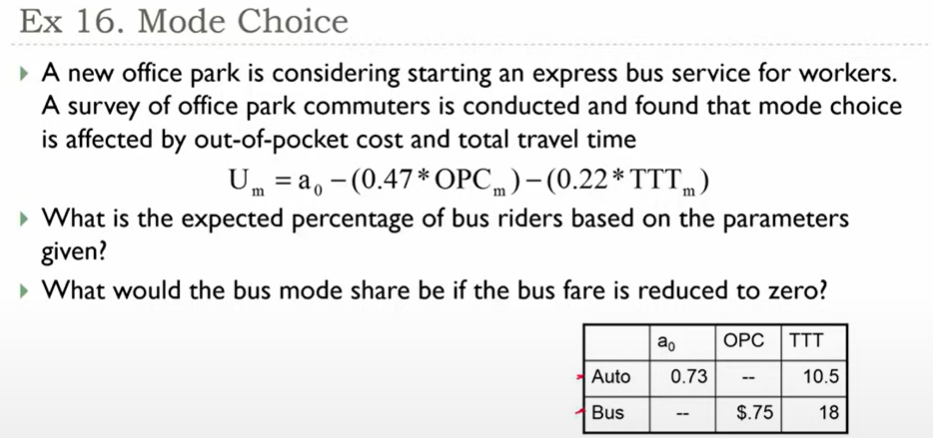

In [8]:
# Helper function to calculate utility 
def calculate_utility(a0,opc,ttt):
    um = a0-(0.47*opc)-(0.22*ttt)
    return um

In [9]:
# Part 1

# Automobile 
a0auto = 0.73 
opcauto = 0 
tttauto = 10.5 
uauto = calculate_utility(a0auto,opcauto,tttauto)

# Bus
a0bus = 0
opcbus = 0.75
tttbus = 18
ubus = calculate_utility(a0bus,opcbus,tttbus)

# Let's compare
print(f'Uauto: {uauto} | Ubus: {ubus}')

# Now get the final answer
Pa = np.exp(uauto)/(np.exp(uauto) + np.exp(ubus)) 
Pb = 1 - Pa
Pb = round(Pb,3)*100
print(f'Expected Percentage of bus riders: {Pb}%')

Uauto: -1.58 | Ubus: -4.3125
Expected Percentage of bus riders: 6.1%


In [10]:
# Part 2 

# Automobile 
a0auto = 0.73 
opcauto = 0 
tttauto = 10.5 
uauto = calculate_utility(a0auto,opcauto,tttauto)

# Bus
a0bus = 0
opcbus = 0
tttbus = 18
ubus = calculate_utility(a0bus,opcbus,tttbus)

# Let's compare
print(f'Uauto: {uauto} | Ubus: {ubus}')

# Now get the final answer
Pa = np.exp(uauto)/(np.exp(uauto) + np.exp(ubus)) 
Pb = 1 - Pa
Pb = round(Pb,3)*100
print(f'Expected Percentage of bus riders: {Pb}%')

Uauto: -1.58 | Ubus: -3.96
Expected Percentage of bus riders: 8.5%
